# 1. Carregar os dados

------------------


In [21]:
pip install pandas numpy tensorflow scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#bibliotecas necessárias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split #treino e teste
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metricas de avaliação
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42) #Configurar seed para reprodutibilidade
tf.random.set_seed(42)

In [23]:
#Carregar os dados de cada nível do motor
nivel0 = pd.read_csv('../data/nivel0.csv')
nivel1 = pd.read_csv('../data/nivel1.csv')
nivel2 = pd.read_csv('../data/nivel2.csv')
nivel3 = pd.read_csv('../data/nivel3.csv')

print("Quantidade original de amostras:")
print(f"Nível 0: {len(nivel0)} amostras") #lÊ a quantidade de dados cada nivel
print(f"Nível 1: {len(nivel1)} amostras")
print(f"Nível 2: {len(nivel2)} amostras")
print(f"Nível 3: {len(nivel3)} amostras")

Quantidade original de amostras:
Nível 0: 1196 amostras
Nível 1: 1206 amostras
Nível 2: 1203 amostras
Nível 3: 1203 amostras


- temos um problema aqui pq a quantidade de amostra de cada nível se encontra desiquilibrada

- Para resolver isso irei pegar o nivel com menor numero de amostras e igualar os outros com ele

In [24]:
min_samples = min(len(nivel0), len(nivel1), len(nivel2), len(nivel3))# Encontrar oe
print(f"\nMenor quantidade: {min_samples} amostras")

# eBalancear os dados pegando apenas min_samples de cada classe
nivel0 = nivel0.sample(n=min_samples, random_state=42).reset_index(drop=True)
nivel1 = nivel1.sample(n=min_samples, random_state=42).reset_index(drop=True)
nivel2 = nivel2.sample(n=min_samples, random_state=42).reset_index(drop=True)
nivel3 = nivel3.sample(n=min_samples, random_state=42).reset_index(drop=True)

#cria coluna com o nivel de cada momento do monto antes do numero de amostra
nivel0['Nivel'] = 0
nivel1['Nivel'] = 1
nivel2['Nivel'] = 2
nivel3['Nivel'] = 3

# Concatenar todos os dados
df = pd.concat([nivel0, nivel1, nivel2, nivel3], ignore_index=True) #concatena os dados para criar o dataset
print(f"\nDistribuição das classes:")
print(df['Nivel'].value_counts().sort_index())


Menor quantidade: 1196 amostras

Distribuição das classes:
Nivel
0    1196
1    1196
2    1196
3    1196
Name: count, dtype: int64


In [25]:
# eparar features e target
features_columns = [col for col in df.columns if col not in ['Amostra', 'Nivel', 'Temperatura']] #tira temperatura as features
X = df[features_columns].values #todas as features para analise 'Acel_X', 'Acel_Y', 'Acel_Z', 'Giro_X', 'Giro_Y', 'Giro_Z
y = df['Nivel'].values #valores
print(X)
print(y)
print(f"X (features): {X.shape}")
print(f"y (labels): {y.shape}")
print(f"Features utilizadas: {features_columns}")

[[ -0.951   0.735   9.923   0.74    1.351   0.374]
 [ -0.987   0.719   9.932   0.847   1.435   0.29 ]
 [ -0.96    0.73    9.956   0.817   1.504   0.397]
 ...
 [ -6.447   2.96    9.82  -10.878  -2.427  -5.702]
 [ -5.827   5.298   8.502  -7.55   -3.763 -11.046]
 [ -1.298   2.824   9.214  -7.198   8.939  -3.519]]
[0 0 0 ... 3 3 3]
X (features): (4784, 6)
y (labels): (4784,)
Features utilizadas: ['Acel_X', 'Acel_Y', 'Acel_Z', 'Giro_X', 'Giro_Y', 'Giro_Z']


# 2. Treinar o modelo

--------

- Para ser feito um treinamento conforme metodologia, deve-se separar os dados em treino, validação e teste

- Em x ta os valores em colunas dos dados de acelerometro coletados, enquanto y amazena as labels, 0,1,2,3 ...

In [26]:
# Primeiro: separa validação (20%) e 80% treino
X_temp, X_val, y_temp, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y #separa os dados em 20% para vlaidação
    #separa os de treino como temp, pois ainda vai ter que separado novamente para treino e teste
)

# Segundo: divide dados de treino e teste.
# separa apartir dos 80% de treino acima, em y_temp, ou seja temp agora tera 64%, e teste ficará com 16%4
#validação ficará da forma que ta acima
X_train, X_test, y_train, y_test = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp #separa 20% dos 80% de treino em teste
)
#dados totais 
print(f"Dados de treino : {X_train.shape[0]} amostras")
print(f"Dados de teste  : {X_test.shape[0]} amostras")
print(f"Dados de validação: {X_val.shape[0]} amostras")
#dados por nivel:
print("\nDistribuição treino:")
print(pd.Series(y_train).value_counts().sort_index()) #sort index ordena o numero de niveis do menor para maior
print("\nDistribuição teste:")
print(pd.Series(y_test).value_counts().sort_index())
print("\nDistribuição validação:")
print(pd.Series(y_val).value_counts().sort_index())


Dados de treino : 3061 amostras
Dados de teste  : 766 amostras
Dados de validação: 957 amostras

Distribuição treino:
0    766
1    765
2    765
3    765
Name: count, dtype: int64

Distribuição teste:
0    191
1    192
2    191
3    192
Name: count, dtype: int64

Distribuição validação:
0    239
1    239
2    240
3    239
Name: count, dtype: int64


In [27]:
y_train

array([1, 0, 3, ..., 3, 2, 0], shape=(3061,))

In [28]:
#Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #nromaliza dados de treino
X_test_scaled = scaler.transform(X_test) #normaliza dados de teste
X_val_scaled = scaler.transform(X_val) #normalizada dos de vlaidação

- Definição do modelo de MLP:

In [29]:
#Arquitetura MLP compacta para TinyML
num_features = X_train_scaled.shape[1] #numero de features - >6  ['Acel_X', 'Acel_Y', 'Acel_Z', 'Giro_X', 'Giro_Y', 'Giro_Z']
print(num_features)
num_classes = len(np.unique(y)) #nuemro de classes do modelo -> 4

model = keras.Sequential([ #sequencia de camadas
    keras.layers.Input(shape=(num_features,)), #input sendo os dados das features
    keras.layers.Dense(32, activation='relu', name='hidden1'), #camada relu
    keras.layers.Dropout(0.2), #dropout para evitar overfitting
    keras.layers.Dense(16, activation='relu', name='hidden2'), #2° camada relu
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', name='output') #camada final usando softmax para classificação
])
# Compilar o modelo com otimizador adam
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] #metrica de avaliação do modelo
)

6


- > Treinar o modelo com a arquitetura definida acima

In [ ]:
# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train, #dados para treino sendo as features normalizadas e as labels
    validation_data= (X_val_scaled, y_val), #dados de validação ja definidos acima sendo os dados da features normalizado
    epochs=200, #quanidade de epocas
    batch_size=32,
    verbose=1
)
#Salvar o modelo original .keras na pasta models/
model.save('../models/motor_classification_model.keras')

Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4485 - loss: 1.2270 - val_accuracy: 0.5935 - val_loss: 1.0915
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6112 - loss: 1.0355 - val_accuracy: 0.7231 - val_loss: 0.8912
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6929 - loss: 0.8558 - val_accuracy: 0.8140 - val_loss: 0.6832
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7596 - loss: 0.6852 - val_accuracy: 0.8715 - val_loss: 0.5183
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7952 - loss: 0.5812 - val_accuracy: 0.9300 - val_loss: 0.4083
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8138 - loss: 0.5099 - val_accuracy: 0.9321 - val_loss: 0.3444
Epoch 7/200


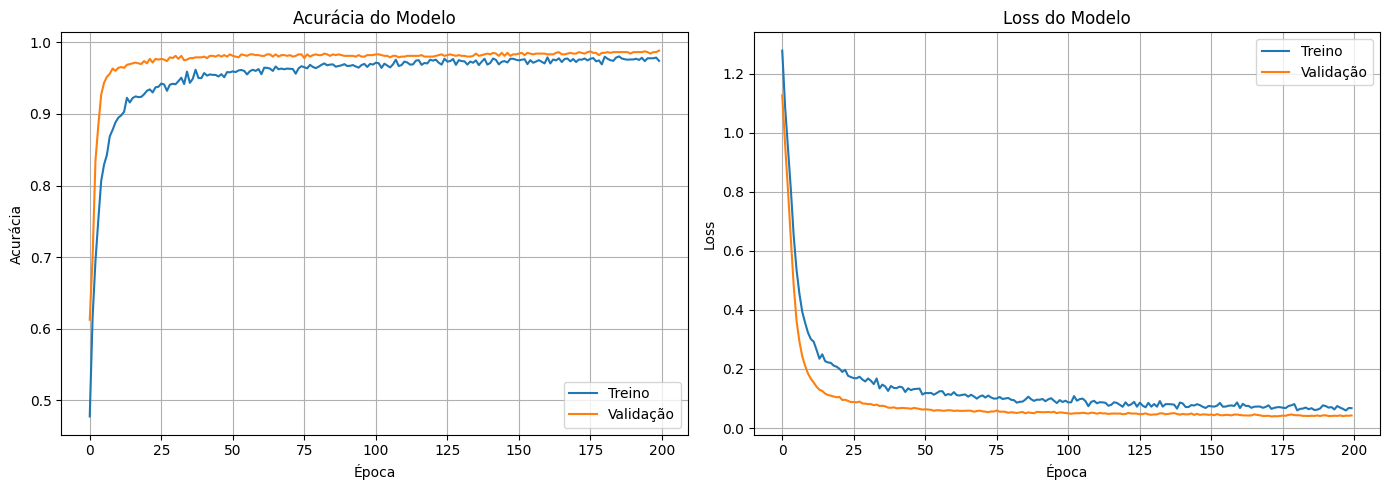

In [ ]:
# Plotar curvas de treinamento
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Acurácia
axes[0].plot(history.history['accuracy'], label='Treino')
axes[0].plot(history.history['val_accuracy'], label='Validação')
axes[0].set_title('Acurácia do Modelo')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Acurácia')
axes[0].legend()
axes[0].grid(True)

#Loss
axes[1].plot(history.history['loss'], label='Treino')
axes[1].plot(history.history['val_loss'], label='Validação')
axes[1].set_title('Loss do Modelo')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Fazer predições
y_pred = model.predict(X_test_scaled) #Prever as classes nos dados de teste (Nao usado no treinamento)
#Para classificação multiclasse, o output do modelo geralmente é uma matriz de probabilidades:
#por exemplo, 0.1 para classe o, 0.7 para classe 1, e 0.3 para classe 2
y_pred_classes = np.argmax(y_pred, axis=1)  #retorna o índice do maior valor ao longo do eixo indicado.

print("Métricas de avaliação")
print(classification_report(y_test, y_pred_classes,  #Relatorio de classificação comparando as labels reais com as de classificação do modelo
                          target_names=[f'Nível {i}' for i in range(num_classes)]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Métricas de avaliação
              precision    recall  f1-score   support

     Nível 0       1.00      1.00      1.00       191
     Nível 1       0.99      0.95      0.97       192
     Nível 2       0.95      0.99      0.97       191
     Nível 3       1.00      1.00      1.00       192

    accuracy                           0.99       766
   macro avg       0.99      0.99      0.99       766
weighted avg       0.99      0.99      0.99       766



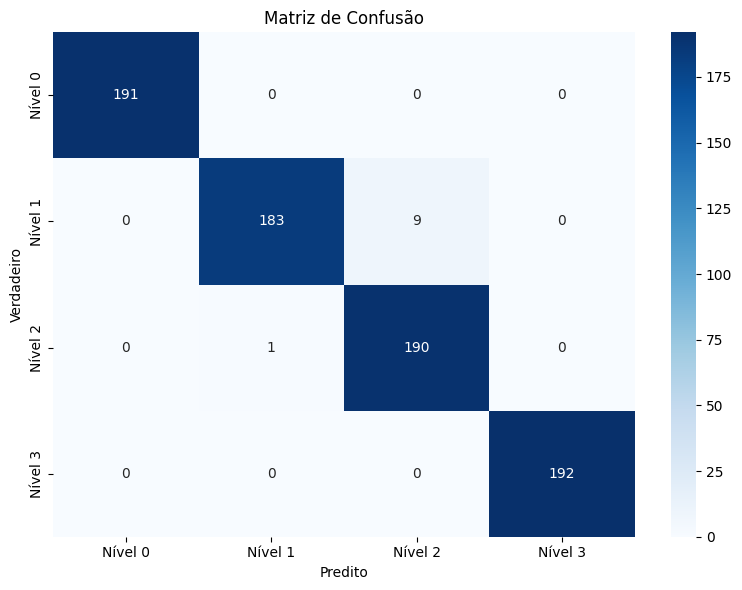


Matriz de Confusão:
[[191   0   0   0]
 [  0 183   9   0]
 [  0   1 190   0]
 [  0   0   0 192]]


In [ ]:
cm = confusion_matrix(y_test, y_pred_classes) #matriz de confusao com as labels reais(y_test) e labels prevista pelo modelo
#apartir do x_Teste

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Nível {i}' for i in range(num_classes)],
            yticklabels=[f'Nível {i}' for i in range(num_classes)])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.tight_layout()
plt.show()

print(f"\nMatriz de Confusão:")
print(cm)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)# Converter para TensorFlow Lite (float32)
tflite_model = converter.convert()

# Salvar modelo TFLite na pasta models/
import os
os.makedirs('../models', exist_ok=True)
tflite_filename = '../models/motor_classification_model.tflite'
with open(tflite_filename, 'wb') as f:
    f.write(tflite_model)

# Verificar tamanho
import os
tflite_size = os.path.getsize(tflite_filename)
print(f"Modelo TFLite salvo: {tflite_filename}")
print(f"Tamanho do arquivo: {tflite_size} bytes ({tflite_size/1024:.2f} KB)")

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpkkqubynb\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpkkqubynb\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmpkkqubynb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2063374749136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2063374752400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2063374752976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2063374752016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2063374751824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2063374753168: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo TFLite salvo: ../models/motor_classification_model.tflite
Tamanho do arquivo: 5376 bytes (5.25 KB)


In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_filename)#Testar o modelo TFLite
interpreter.allocate_tensors()

# Obter detalhes de entrada e saída
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
# Testar com algumas amostras
num_test_samples = 30
y_pred_tflite = []
for i in range(num_test_samples):
    input_data = X_test_scaled[i:i+1].astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred_tflite.append(np.argmax(output_data))

# Comparar predições
print(f"\nComparação de predições (primeiras {num_test_samples} amostras):")
print("Índice | Real | Keras | TFLite | Match")
print("-" * 45)
for i in range(num_test_samples):
    keras_pred = y_pred_classes[i]
    tflite_pred = y_pred_tflite[i]
    match = "✓" if keras_pred == tflite_pred else "✗"
    print(f"  {i:3d}  |  {y_test[i]}   |   {keras_pred}   |   {tflite_pred}    |  {match}")


Comparação de predições (primeiras 30 amostras):
Índice | Real | Keras | TFLite | Match
---------------------------------------------
    0  |  1   |   1   |   1    |  ✓
    1  |  1   |   2   |   2    |  ✓
    2  |  1   |   1   |   1    |  ✓
    3  |  3   |   3   |   3    |  ✓
    4  |  2   |   2   |   2    |  ✓
    5  |  2   |   2   |   2    |  ✓
    6  |  1   |   1   |   1    |  ✓
    7  |  1   |   1   |   1    |  ✓
    8  |  3   |   3   |   3    |  ✓
    9  |  1   |   1   |   1    |  ✓
   10  |  2   |   2   |   2    |  ✓
   11  |  0   |   0   |   0    |  ✓
   12  |  1   |   1   |   1    |  ✓
   13  |  3   |   3   |   3    |  ✓
   14  |  2   |   2   |   2    |  ✓
   15  |  1   |   1   |   1    |  ✓
   16  |  1   |   2   |   2    |  ✓
   17  |  1   |   1   |   1    |  ✓
   18  |  0   |   0   |   0    |  ✓
   19  |  0   |   0   |   0    |  ✓
   20  |  1   |   1   |   1    |  ✓
   21  |  3   |   3   |   3    |  ✓
   22  |  3   |   3   |   3    |  ✓
   23  |  1   |   1   |   1    |  ✓
 

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


# 3. Converter modelo tflite para .h para rodar no Pico

----------------

In [ ]:
#gerar arquivo .h para usar em embarcado
def convert_to_c_array(tflite_model, var_name='model_data'):
    hex_array = [f'0x{byte:02x}' for byte in tflite_model]
    
    #Criar string do array C
    c_array = f"const unsigned char {var_name}[] = {{\n"
    
    # Adicionar bytes (16 por linha)
    for i in range(0, len(hex_array), 16):
        line = "  " + ", ".join(hex_array[i:i+16])
        if i + 16 < len(hex_array):
            line += ","
        c_array += line + "\n"
    c_array += "};\n"
    c_array += f"const unsigned int {var_name}_len = {len(tflite_model)};\n"
    return c_array

# Criar pasta firmware/libs se não existir
import os
os.makedirs('../firmware/libs', exist_ok=True)

# Gerar para modelo float32
h_content = """// Motor Classification Model - TinyML
// Auto-generated file - Do not edit manually
// Model trained on MPU6050 data (Accel + Gyro)

#ifndef MOTOR_MODEL_H
#define MOTOR_MODEL_H

"""

h_content += convert_to_c_array(tflite_model, 'motor_model')

h_content += """
// Model information
#define NUM_FEATURES 6
#define NUM_CLASSES 4

// Class names
const char* class_names[] = {
  "Nivel 0",
  "Nivel 1",
  "Nivel 2",
  "Nivel 3"
};

#endif // MOTOR_MODEL_H
"""

# Salvar arquivo .h na pasta firmware/libs/
h_filename = '../firmware/libs/motor_model.h'
with open(h_filename, 'w') as f:
    f.write(h_content)

print(f"Arquivo {h_filename} gerado com sucesso!")
print(f"Tamanho do modelo: {len(tflite_model)} bytes")

Arquivo ../firmware/include/motor_model.h gerado com sucesso!
Tamanho do modelo: 5376 bytes



**Descrição:** Arquivo de cabeçalho gerado automaticamente (TinyML) contendo a rede neural treinada para classificação de estados do motor via acelerômetro/giroscópio.

## Componentes do Arquivo

| Componente | Tipo | Descrição Técnica |
| :--- | :--- | :--- |
| **`motor_model[]`** | `unsigned char array` | **O Modelo Serializado.** Contém os pesos, vieses e grafo da rede neural convertidos para hexadecimal (formato FlatBuffer do TFLite). É aqui que a "inteligência" reside. |
| **`motor_model_len`** | `unsigned int` | **Tamanho do Modelo.** Define o tamanho do array (~5.4 KB). Necessário para o interpretador saber quanta memória ler da Flash. |
| **`NUM_FEATURES`** | `define (6)` | **Tensor de Entrada.** O modelo exige um vetor com 7 valores `float` (ex: Aceleração X,Y,Z + Giroscópio X,Y,Z ). |
| **`NUM_CLASSES`** | `define (4)` | **Tensor de Saída.** O modelo retorna 4 probabilidades, correspondendo aos 4 estados possíveis de vibração. |
| **`class_names[]`** | `const char* array` | **Decodificador.** Mapeia o índice de saída (0, 1, 2, 3) para texto legível ("Nivel 0" a "Nivel 3"). |


In [ ]:
#Salvar parâmetros do scaler para usar no RP2040
scaler_params = {
    'mean': scaler.mean_.tolist(),
    'scale': scaler.scale_.tolist(),
    'features': features_columns
}

# Criar arquivo header com parâmetros de normalização
scaler_h_content = """// Scaler parameters for normalization
#ifndef SCALER_PARAMS_H
#define SCALER_PARAMS_H

// Mean values
const float scaler_mean[] = {
"""

for i, mean_val in enumerate(scaler.mean_):
    scaler_h_content += f"  {mean_val:.6f}f"
    if i < len(scaler.mean_) - 1:
        scaler_h_content += ","
    scaler_h_content += f"  // {features_columns[i]}\n"

scaler_h_content += """};\n\n// Scale (standard deviation) values
const float scaler_scale[] = {
"""

for i, scale_val in enumerate(scaler.scale_):
    scaler_h_content += f"  {scale_val:.6f}f"
    if i < len(scaler.scale_) - 1:
        scaler_h_content += ","
    scaler_h_content += f"  // {features_columns[i]}\n"

scaler_h_content += """};\n
#endif // SCALER_PARAMS_H
"""

# Salvar na pasta firmware/libs/
with open('../firmware/libs/scaler_params.h', 'w') as f:
    f.write(scaler_h_content)

print("Arquivo '../firmware/libs/scaler_params.h' gerado com sucesso!")
print("\nParâmetros do Scaler:")
print(f"Mean: {scaler.mean_}")
print(f"Scale: {scaler.scale_}")

Arquivo '../firmware/include/scaler_params.h' gerado com sucesso!

Parâmetros do Scaler:
Mean: [-0.99149036  0.65975139  9.9512558   0.64237961  1.29643483  0.32675368]
Scale: [2.60628105 1.49812223 0.58061833 4.72781293 3.47796578 4.31747792]



**Descrição:** Script Python responsável por exportar os parâmetros estatísticos do `StandardScaler` (Scikit-Learn) para um arquivo de cabeçalho C. Garante que o pré-processamento no microcontrolador seja matematicamente idêntico ao do treinamento.

## Componentes Exportados

| Componente Python | Componente C Gerado | Descrição Técnica |
| :--- | :--- | :--- |
| **`scaler.mean_`** | `const float scaler_mean[]` | **Vetor de Médias.** Valor médio de cada feature observado durante o treinamento. Deve ser *subtraído* do dado bruto do sensor. |
| **`scaler.scale_`** | `const float scaler_scale[]` | **Vetor de Escala.** Desvio padrão de cada feature. O resultado da subtração deve ser *dividido* por este valor. |
| **`features_columns`** | `// Comentários` | **Rastreabilidade.** Os nomes das colunas são inseridos como comentários no código C, garantindo que você saiba qual índice (0, 1, 2...) pertence a qual eixo do sensor. |

## Fórmula de Aplicação (Firmware)

O microcontrolador deve aplicar a seguinte fórmula matemática (Z-Score) para cada feature $i$ antes da inferência:

$$Input_{normalizado} = \frac{ValorBruto_i - scaler\_mean[i]}{scaler\_scale[i]}$$

